In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2024-04-13 20:18:02.631671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load and preprocess the dataset (e.g., MNIST)
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()


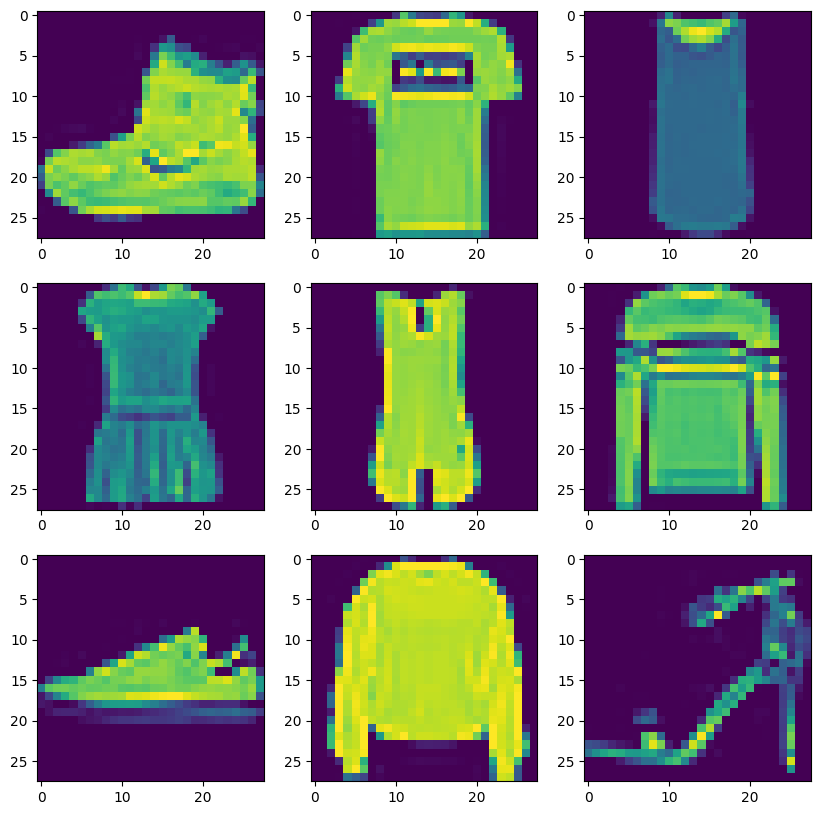

In [4]:
plt.figure(figsize=(10,10))
for i, image in enumerate(x_train[:9]):
    plt.subplot(3,3,i + 1)
    plt.imshow(image)

In [5]:
# RESCALE 

rescale = tf.keras.layers.Rescaling(scale=1./255)
x_train = rescale(x_train)


In [6]:
# Define the generator model
def build_generator(input_shape=(100,)):
    model = models.Sequential([
        layers.Dense(128, input_shape=input_shape, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(28*28, activation='sigmoid'),  # Output layer for generating grayscale image (28x28)
        layers.Reshape((28, 28, 1))  # Reshape output to match image dimensions
    ])
    return model

# Define the discriminator model
def build_discriminator(input_shape=(28, 28, 1)):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification (real vs. fake)
    ])
    return model

In [7]:
# Build the generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

In [48]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 784)               402192    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 579,728
Trainable params: 579,728
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Build the GAN model
z = layers.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False  # Freeze the discriminator during training of the generator
validity = discriminator(img)
gan = models.Model(z, validity)

In [10]:
# Compile the GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
print(np.random.normal(0, 1, (2, 3)))

[[ 0.74612967  1.78415906  0.55324557]
 [-0.26966971  0.08450049  0.8997711 ]]


In [20]:
# Training parameters
epochs = 20
batch_size = 10

to_train = x_train[:100]
print(to_train.shape)

# Training loop
for epoch in range(epochs):
    for r in range(to_train.shape[0] // batch_size):
        print(f'Generating .... {r}')
        # Train the discriminator
        idx = np.random.randint(0, to_train.shape[0], batch_size)
        real_imgs = to_train.numpy()[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_imgs = generator.predict(noise)
        # Label 1 for real
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        # Label 0 for fake
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
        # Average of loss
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        # Since the generator's objective is to fool the discriminator into classifying its generated images as real, we label the generated images as real by passing labels of 1 (np.ones((batch_size, 1))).
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
    # Print training progress
    print(f"Epoch {epoch+1}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

(100, 28, 28)
Generating .... 0
1/1 [==============================] - 0s 20ms/step
Generating .... 1
1/1 [==============================] - 0s 16ms/step
Generating .... 2
1/1 [==============================] - 0s 19ms/step
Generating .... 3
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:15.003521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.012210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.019472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 4
1/1 [==============================] - 0s 20ms/step
Generating .... 5
1/1 [==============================] - 0s 19ms/step
Generating .... 6
1/1 [==============================] - 0s 25ms/step


2024-04-13 20:25:15.210310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.262525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.270418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 7
1/1 [==============================] - 0s 18ms/step
Generating .... 8
1/1 [==============================] - 0s 16ms/step
Generating .... 9
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:15.414623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.422550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.471266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Epoch 1, D Loss: 1.609915251751997e-20, G Loss: 1.495254192334338e-17
Generating .... 0
1/1 [==============================] - 0s 19ms/step
Generating .... 1
1/1 [==============================] - 0s 18ms/step
Generating .... 2
1/1 [==============================] - 0s 19ms/step
Generating .... 3
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:15.659518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.667514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.674787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 4
1/1 [==============================] - 0s 19ms/step
Generating .... 5
1/1 [==============================] - 0s 18ms/step
Generating .... 6
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:15.866198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.916602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:15.924315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 7
1/1 [==============================] - 0s 20ms/step
Generating .... 8
1/1 [==============================] - 0s 20ms/step
Generating .... 9
1/1 [==============================] - 0s 19ms/step
Epoch 2, D Loss: 3.026734263385786e-17, G Loss: 6.061063276124105e-24
Generating .... 0


2024-04-13 20:25:16.116645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.124358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.131607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

1/1 [==============================] - 0s 17ms/step
Generating .... 1
1/1 [==============================] - 0s 17ms/step
Generating .... 2
1/1 [==============================] - 0s 19ms/step
Generating .... 3
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:16.327602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.335652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.342695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 4
1/1 [==============================] - 0s 19ms/step
Generating .... 5
1/1 [==============================] - 0s 17ms/step
Generating .... 6
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:16.532741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.585194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.592853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 7
1/1 [==============================] - 0s 18ms/step
Generating .... 8
1/1 [==============================] - 0s 18ms/step
Generating .... 9
1/1 [==============================] - 0s 19ms/step
Epoch 3, D Loss: 4.2486864261343345e-16, G Loss: 1.2830138286584478e-24
Generating .... 0
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:16.776105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.783567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:16.790567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 1
1/1 [==============================] - 0s 18ms/step
Generating .... 2
1/1 [==============================] - 0s 20ms/step
Generating .... 3
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:16.981993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.034822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.042344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 4
1/1 [==============================] - 0s 22ms/step
Generating .... 5
1/1 [==============================] - 0s 19ms/step
Generating .... 6
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:17.190304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.247390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.256631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 7
1/1 [==============================] - 0s 18ms/step
Generating .... 8
1/1 [==============================] - 0s 20ms/step
Generating .... 9
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:17.397595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.445490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.453140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Epoch 4, D Loss: 4.154537059685794e-16, G Loss: 1.0615334381238228e-24
Generating .... 0
1/1 [==============================] - 0s 21ms/step
Generating .... 1
1/1 [==============================] - 0s 18ms/step
Generating .... 2
1/1 [==============================] - 0s 20ms/step
Generating .... 3
1/1 [==============================] - 0s 21ms/step


2024-04-13 20:25:17.657221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.665252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.673280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 4
1/1 [==============================] - 0s 19ms/step
Generating .... 5
1/1 [==============================] - 0s 19ms/step
Generating .... 6
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:17.863604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.872577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:17.924347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 7
1/1 [==============================] - 0s 21ms/step
Generating .... 8
1/1 [==============================] - 0s 21ms/step
Generating .... 9


2024-04-13 20:25:18.067439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.075457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.129922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

1/1 [==============================] - 0s 19ms/step
Epoch 5, D Loss: 1.0578737415068806e-16, G Loss: 1.0370407861309077e-24
Generating .... 0
1/1 [==============================] - 0s 19ms/step
Generating .... 1
1/1 [==============================] - 0s 19ms/step
Generating .... 2
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:18.301653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.309604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.317563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 3
1/1 [==============================] - 0s 17ms/step
Generating .... 4
1/1 [==============================] - 0s 19ms/step
Generating .... 5
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:18.509028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.517502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.566099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 6
1/1 [==============================] - 0s 18ms/step
Generating .... 7
1/1 [==============================] - 0s 19ms/step
Generating .... 8
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:18.715505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.765816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.773176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 9
1/1 [==============================] - 0s 19ms/step
Epoch 6, D Loss: 1.0600269257290427e-16, G Loss: 1.0339518040412885e-24
Generating .... 0
1/1 [==============================] - 0s 21ms/step
Generating .... 1
1/1 [==============================] - 0s 19ms/step
Generating .... 2
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:18.966205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.974374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:18.983116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 3
1/1 [==============================] - 0s 39ms/step
Generating .... 4
1/1 [==============================] - 0s 18ms/step
Generating .... 5


2024-04-13 20:25:19.172150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.179685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.257271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

1/1 [==============================] - 0s 19ms/step
Generating .... 6
1/1 [==============================] - 0s 20ms/step
Generating .... 7
1/1 [==============================] - 0s 20ms/step
Generating .... 8
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:19.384880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.393355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.400798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 9
1/1 [==============================] - 0s 18ms/step
Epoch 7, D Loss: 1.0602897044655767e-16, G Loss: 1.0333657789963224e-24
Generating .... 0
1/1 [==============================] - 0s 18ms/step
Generating .... 1
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:19.591042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.598630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.648059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 2
1/1 [==============================] - 0s 20ms/step
Generating .... 3
1/1 [==============================] - 0s 20ms/step
Generating .... 4
1/1 [==============================] - 0s 19ms/step


2024-04-13 20:25:19.793534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.845434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:19.853141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 5
1/1 [==============================] - 0s 28ms/step
Generating .... 6
1/1 [==============================] - 0s 21ms/step
Generating .... 7
1/1 [==============================] - 0s 20ms/step
Generating .... 8


2024-04-13 20:25:20.061025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.073716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.086632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

1/1 [==============================] - 0s 20ms/step
Generating .... 9
1/1 [==============================] - 0s 19ms/step
Epoch 8, D Loss: 1.0603131963949799e-16, G Loss: 1.0331707331375066e-24
Generating .... 0
1/1 [==============================] - 0s 19ms/step
Generating .... 1


2024-04-13 20:25:20.280957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.288881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.311171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

1/1 [==============================] - 0s 20ms/step
Generating .... 2
1/1 [==============================] - 0s 19ms/step
Generating .... 3
1/1 [==============================] - 0s 18ms/step
Generating .... 4
1/1 [==============================] - 0s 20ms/step


2024-04-13 20:25:20.509304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.517037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.525159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 5
1/1 [==============================] - 0s 20ms/step
Generating .... 6
1/1 [==============================] - 0s 17ms/step
Generating .... 7
1/1 [==============================] - 0s 18ms/step


2024-04-13 20:25:20.713203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.720886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	 [[{{node Placeholder/_1}}]]
2024-04-13 20:25:20.775993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10,1]
	

Generating .... 8
1/1 [==============================] - 0s 19ms/step
Generating .... 9


In [61]:
gan.save('gan.h5')
generator.save('generator.h5')
discriminator.save('descriminator.h5')

1/1 [==============================] - 0s 55ms/step


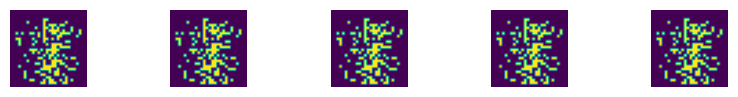

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# generator = tf.keras.models.load_model('generator.h5')
# Generate random noise vectors
num_samples = 5  # Number of images to generate
noise = np.random.normal(0, 1, (num_samples, 100))  # Generate random noise vectors of shape (num_samples, 100)

# Generate images
generated_images = generator.predict(noise)

# Plot the generated images
plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_images[i])  # Assuming generated images are grayscale
    plt.axis('off')
plt.show()